In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
from functools import partial
from dask.local import get_async
from dask import bag as db
from dask import array as da
import sprite2
import numpy as np
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import sprite2.aws
import sprite2.dask
import os
import math
import dask

In [3]:
# set up logging
logging.basicConfig(
    level=logging.DEBUG,
    format='%(levelname)-5s %(asctime)s %(name)s %(threadName)s: %(message)s')
logging.getLogger().setLevel(logging.ERROR)
logging.getLogger('botocore').setLevel(logging.ERROR)
logging.getLogger('sprite2').setLevel(logging.ERROR)
logging.getLogger().info('hi')

## Dask Redundant

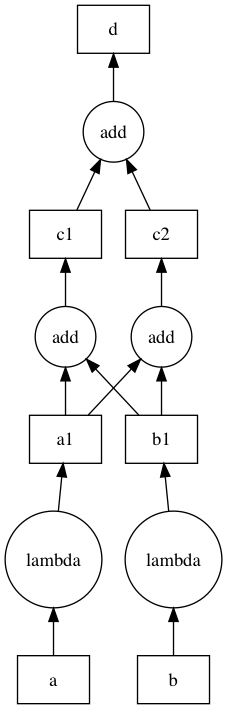

In [4]:
inc = lambda o: o+1
def add(a, b):
    print(f"{a}+{b}")
    return a+b
tasks = {
    'a' : 1,
    'b' : 2,
    'a1' : (inc, 'a'),
    'b1' : (inc, 'b'),
    'c1' : (add, 'a1', 'b1'),
    'c2' : (add, 'a1', 'b1'),
    'd'  : (add, 'c1', 'c2')
}
dask.visualize(tasks)

## Dask Redundant Part 2 (delayed)

In [5]:
d_add = dask.delayed(add)
d_inc = dask.delayed(inc)
a = 1
b = 2
a1 = d_inc(a)
b1 = d_inc(b)
c1 = d_add(a1, b1)
c2 = d_add(a1, b1)
d  = d_add(c1, c2)

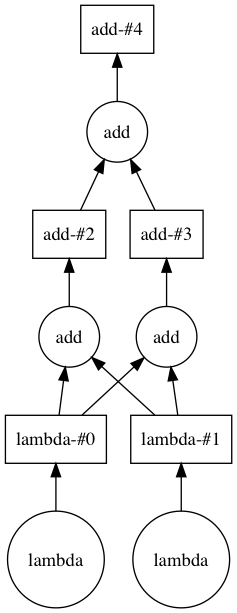

In [6]:
d.visualize()

## Dask Consise (pure)

Pure functions (by definition) alwayse produce the same results given the same inputs.  Dask creates consistent task names for functions marked pure.  Notice below in the task graph there is no redundancy.

In [7]:
d_add = dask.delayed(add, pure=True)  # <-- notice 'pure'
d_inc = dask.delayed(inc, pure=True)  # <-- notice 'pure'
a = 1
b = 2
a1 = d_inc(a)
b1 = d_inc(b)
c1 = d_add(a1, b1)
c2 = d_add(a1, b1)
d  = d_add(c1, c2)

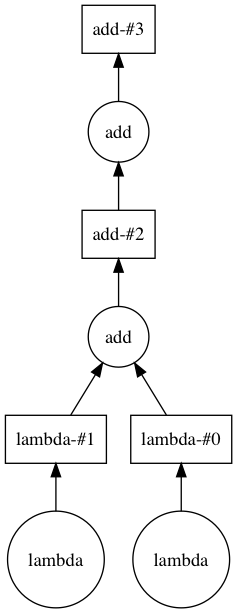

In [8]:
d.visualize()